In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import json

In [12]:
nodes_df = pd.read_csv('data/nodes.csv', index_col=0,sep = ',')
edges_df = pd.read_csv('data/edges.csv')

nodes_df[' viz'] = nodes_df[' viz'].apply(lambda row: row.replace("'", '"')).apply(json.loads)
nodes_df['size'] = nodes_df[' viz'].apply(lambda row: row['size'] * 20)

nodes_df[' _pos'] = nodes_df[' _pos'].apply(lambda row: (float(row[7:18]), float(row[20:-2])))

In [13]:
links = edges_df['coordinates'] = edges_df.apply(lambda row: (row['# source'], row[' target'], row[' weight']), axis=1)

labels = enumerate(nodes_df[' label'])
labels = dict(labels)

pos = nodes_df[' _pos']



### Draw the graph

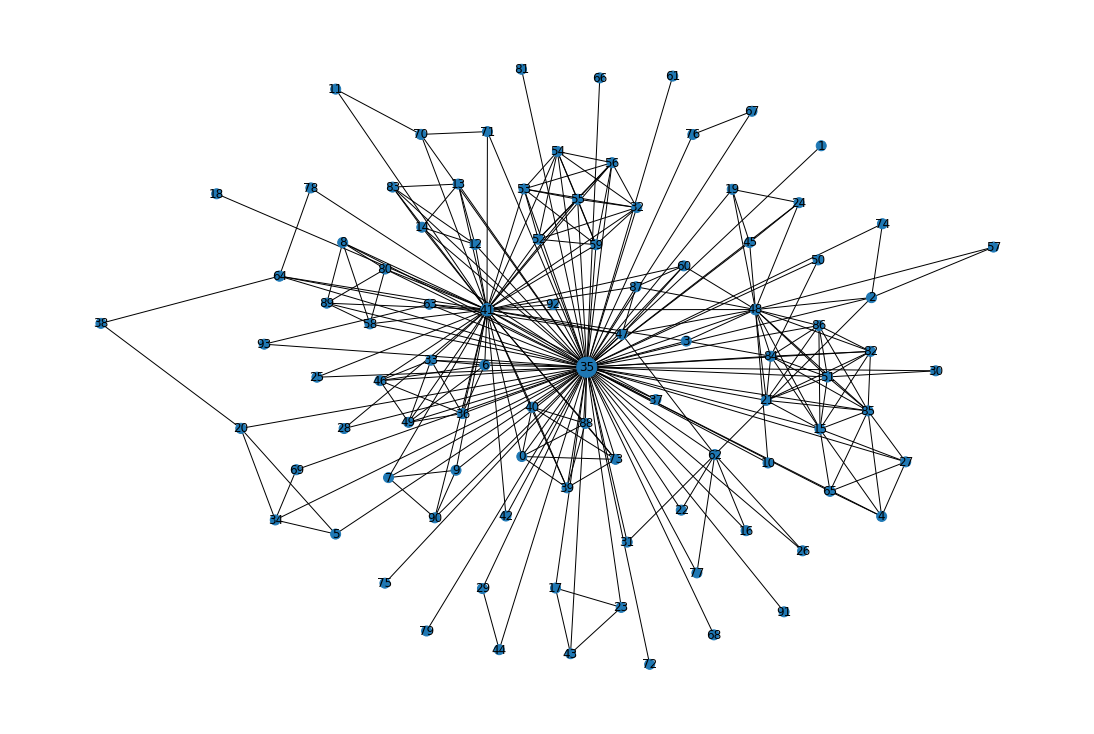

In [14]:
# Draw the graph

plt.figure(figsize=(15, 10))
G = nx.Graph()

for n in range(0, len(nodes_df)):
    G.add_node(n)

G.add_weighted_edges_from(links)
nx.set_node_attributes(G, labels, name = 'label')


nx.draw(G, node_size = nodes_df['size'], pos = pos, with_labels = True)

### Number of nodes

In [15]:
G.number_of_nodes()

94

### Number of edges

In [16]:
G.number_of_edges()

271

### Density

In [17]:
nx.density(G)

0.06199954243880119

### Find the connected components

In [18]:
cc = [i for i in nx.connected_components(G)]
cc

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93}]

### Diameter

In [19]:
nx.diameter(G)

4

### Distance

In [20]:
nx.average_shortest_path_length(G)

1.9949668268130862

### Average clustering

In [21]:
nx.average_clustering(G)

0.8002425574908809

### Transitivity

In [27]:
# T = 3 * (Number of triangles) / ( N(N-1) / 2 )

def transitivity(G):

    # Actual number of triangles is 'triangles'/3, but the denominator semplifies with the '3' in the main formula

    triangles = sum(nx.triangles(G).values())
    sum_of_degrees = 0
    
    for node in G.nodes():
        fraction = (G.degree(node) * (G.degree(node) - 1))/2
        sum_of_degrees += fraction

    return  triangles/sum_of_degrees


transitivity(G)

0.1918081918081918

In [28]:
nx.transitivity(G)

0.1918081918081918